In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("C:/Users/91878/Desktop/ /Data Science tools/Asignments/Project - 1&2_ Simple_Reg/Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA- Exploratory Data Analysis

### Summary Statistics

In [4]:
print("Mean:",np.mean(data))
print("Median:", np.median(data))
print("Variance:", np.var(data))
print("Standard Deviation:", np.std(data))

Mean: 38004.15666666666
Median: 18870.75
Variance: YearsExperience    7.785156e+00
Salary             7.264993e+08
dtype: float64
Standard Deviation: YearsExperience        2.790189
Salary             26953.650249
dtype: float64


### Checking Null Values, Data Types and information about data

In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [8]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Correlation

In [9]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Correlation Plot using Heatmap

<Axes: >

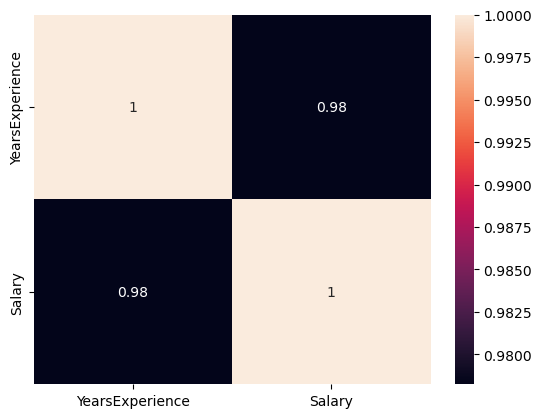

In [10]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
# Inference: We can see that both the feature and the label of our dataset are positively correlated with each other.

### Distribution of Dataset

C:\Users\91878\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


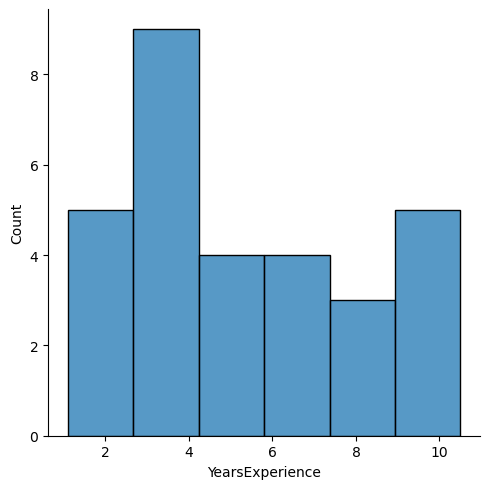

In [13]:
sns.displot(data['YearsExperience'])

C:\Users\91878\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


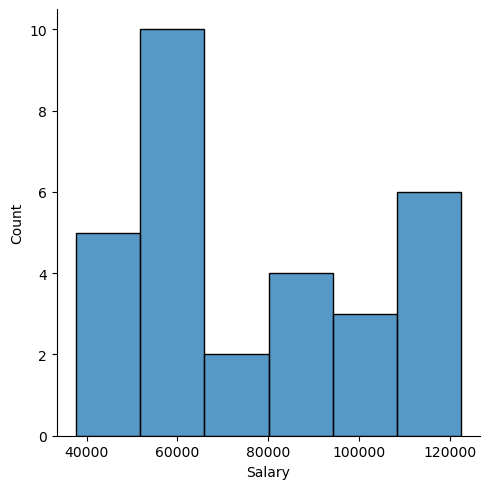

In [14]:
sns.displot(data['Salary'])

#### Both the datasets are not distributed normally

<Axes: xlabel='YearsExperience'>

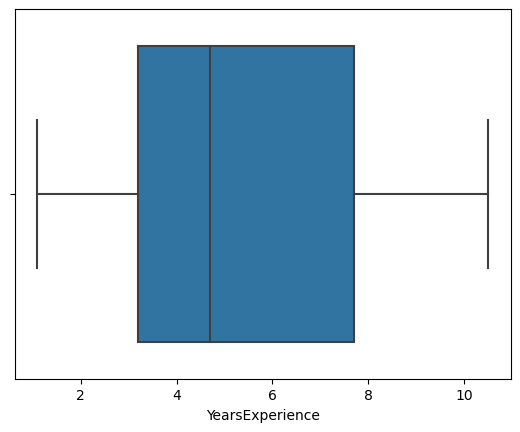

In [15]:
sns.boxplot(x=data['YearsExperience'])

<Axes: xlabel='Salary'>

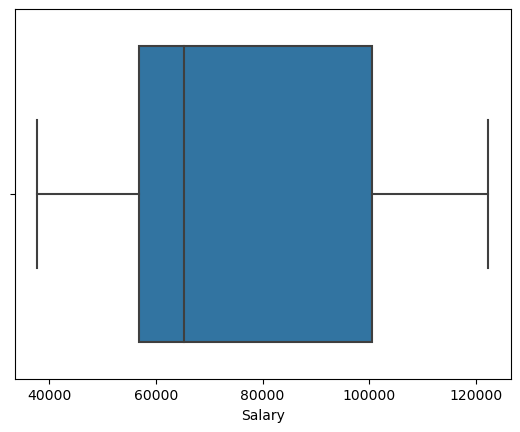

In [16]:
sns.boxplot(x=data['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

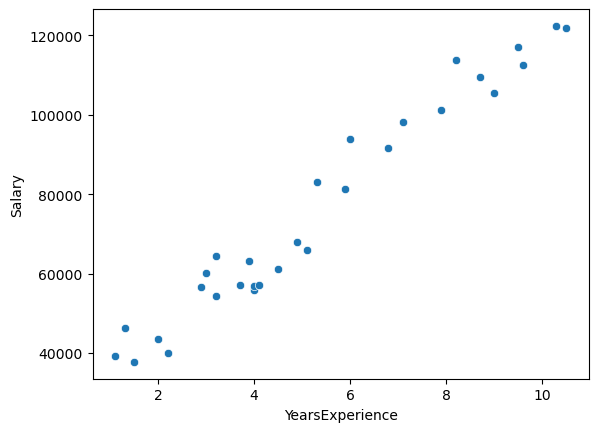

In [17]:
sns.scatterplot(x='YearsExperience', y='Salary', data=data)

### It represents a positive correlation between YearsExperience and Salary

## SKLEARN Model for Prediction

### Sampling the data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
data.shape

(30, 2)

### Splitting the data

In [35]:
X=data['YearsExperience']
y=data['Salary']

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8)

In [6]:
# Checking training data shape
X_train.shape, y_train.shape 

((24,), (24,))

In [37]:
# Checking testing data  shape
X_test.shape, y_test.shape

((6,), (6,))

In [38]:
# reshaping the data as it is in Simple linear form
X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)

In [13]:
model=LinearRegression()
model_fit=model.fit(X_train,y_train)

In [10]:
model_fit

LinearRegression()

In [14]:
model_fit.coef_

array([[9010.76776124]])

In [15]:
model_fit.intercept_

array([28926.63655697])

### Making Prediction

In [39]:
X_test=X_test.values.reshape(-1,1)
predict=model_fit.predict(X_test)
predict

array([[ 76683.70569153],
       [ 64969.70760192],
       [ 64068.63082579],
       [ 57761.09339293],
       [ 42442.78819882],
       [114528.93028872]])

In [22]:
data_pred=pd.DataFrame(predict, columns=['Predicted_data'])

In [24]:
## putting values of y_test in the Actual_data column in dataframe
data_pred["Actual_data"]=y_test.values

In [40]:
## Comparing the Actual and Predicted Data side by side
data_pred[['Actual_data','Predicted_data']]

,Actual_data,Predicted_data
0,61111.0,69475.091483
1,121872.0,123539.698050
2,56957.0,64969.707602
3,37731.0,42442.788199
4,67938.0,73079.398587
5,39343.0,38838.481094


In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [42]:
# Strength of the model
r2_score(data_pred['Actual_data'], data_pred['Predicted_data'])

0.9606329709041104

#### This is a high R2 score, suggesting that the linear regression model fits the data quite well, capturing a significant portion of the variability in the dependent variable.

In [43]:
# Root Mean Squared Error
sqrt(mean_squared_error(data_pred['Actual_data'], data_pred['Predicted_data']))

5565.2522107475925

## Visualizing the training data

Text(0, 0.5, 'Salary')

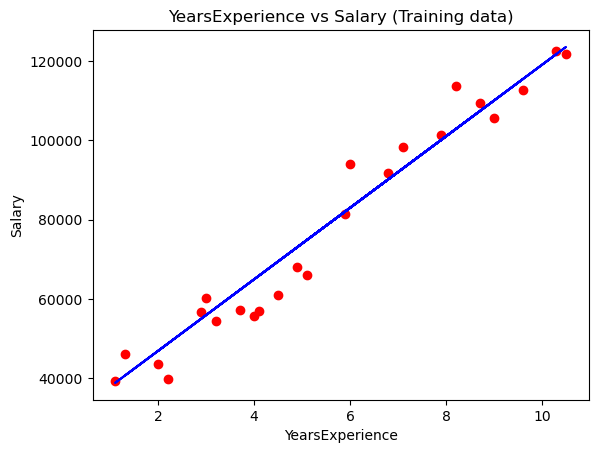

In [44]:
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train,model.predict(X_train), color='blue')
plt.title('YearsExperience vs Salary (Training data)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

## Visualizing the test data

Text(0, 0.5, 'Salary')

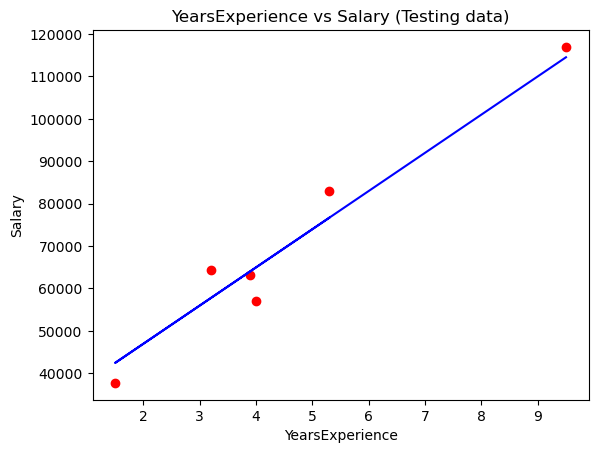

In [48]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test,model.predict(X_test),color='blue')
plt.title('YearsExperience vs Salary (Testing data)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')